# Bước 1: Cài đặt các thư viện cần thiết

In [1]:
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 16.7 MB 44.5 MB/s 
     |████████████████████████████████| 6.3 MB 58.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install rtree
!pip install pygeos
!pip install geojson
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import geopandas as gpd
import numpy as np
import rtree
import matplotlib.pyplot as plt
import folium
import osmnet
import geojson
import pygeos
import pandas as pd

In [4]:
pwd

'/content'

In [5]:
%cd '/content/drive/MyDrive/Colab Notebooks/cs116_python_ml'

/content/drive/MyDrive/Colab Notebooks/cs116_python_ml


# Bước 2: Clone data 

In [6]:
!git clone https://github.com/CityScope/CSL_HCMC

fatal: destination path 'CSL_HCMC' already exists and is not an empty directory.


# Bước 3: Load ranh giới quận huyện và dân số quận huyện

---

load từ Data\GIS\Population\population_HCMC\population_shapefile\Population_District_Level.shp

In [7]:
path = '/content/drive/MyDrive/Colab Notebooks/cs116_python_ml/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp'

In [8]:
data = gpd.read_file(path)
data.head()

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."


# Bước 4: Load dữ liệu click của người dùng

In [9]:
path = '/content/drive/MyDrive/Colab Notebooks/cs116_python_ml/ex4/click_data.json'

In [10]:
data_click = gpd.read_file(path)

In [11]:
data_click.head()

,dbh,geometry
0,1,POINT (106.71136 10.85113)
1,1,POINT (106.71695 10.74449)
2,1,POINT (106.66315 10.83289)
3,1,POINT (106.66267 10.83339)
4,1,POINT (106.65977 10.83729)


# Bước 5: Lọc ra 5 quận huyện có tốc độ tăng MẬT ĐỘ dân số nhanh nhất (Dùng dữ liệu 2019  và 2017)

In [12]:
data['growth_den'] = data['Den_2019'] / data['Den_2017']
data_top_5 = data.nlargest(5, 'growth_den')

In [13]:
data_top_5

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,growth_den
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",1.277620
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.550 1...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",1.162075
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",1.129461
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",1.113106


In [14]:
data_top_5.crs

<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
data_top_5 = data_top_5.to_crs(epsg=32648)
print(data_top_5.crs)
data_top_5.head()

epsg:32648


,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,growth_den
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",1.277620
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.550 1...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",1.162075
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",1.129461
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",1.113106


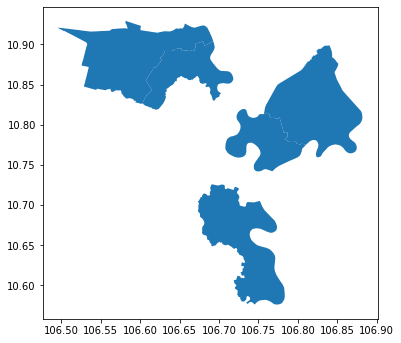

In [42]:
data_top_5.plot(figsize=(6, 6))
plt.show()

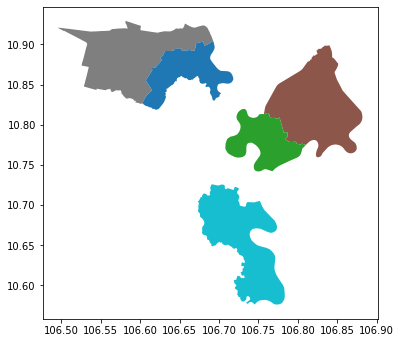

In [43]:
data_top_5.plot(data_top_5['Dist_Name'],figsize=(6, 6))
plt.show()

# Bước 6: Dùng spatial join (from geopandas.tools import sjoin) để lọc ra các điểm click của người dùng trong 5 quận/huyện hot nhất

In [17]:
from geopandas.tools import sjoin

In [18]:
data_click.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
data_top_5 = data_top_5.to_crs(4326)
data_top_5.head()

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,growth_den
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((106.84015 10.89893, 106.84048 10.897...",1.277620
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((106.58361 10.92869, 106.58391 10.928...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((106.72315 10.72162, 106.72428 10.721...",1.162075
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((106.69433 10.89842, 106.69446 10.897...",1.129461
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((106.74241 10.80855, 106.74442 10.808...",1.113106


In [20]:
print(data_click.crs)
print(data_top_5.crs)

epsg:4326
epsg:4326


In [21]:
click_top_5 = sjoin(data_click, data_top_5, how='left', op='within')
click_top_5 = click_top_5.dropna()
click_top_5

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,growth_den
126,1,POINT (106.57481 10.90807),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3634.00,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,1.215639
222,1,POINT (106.76471 10.82926),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2419.33,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,1.277620
283,1,POINT (106.76238 10.59443),18.0,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,...,1188.34,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,1.162075
342,1,POINT (106.68818 10.85636),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129461
368,1,POINT (106.71118 10.85242),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83292,1,POINT (106.71130 10.85206),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129461
83372,1,POINT (106.76182 10.82430),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2419.33,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,1.277620
83394,1,POINT (106.72823 10.78867),17.0,District 2,769,District,147490.0,140621.0,137749.0,134131.0,...,2685.95,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,1.113106
83466,1,POINT (106.71118 10.86631),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129461


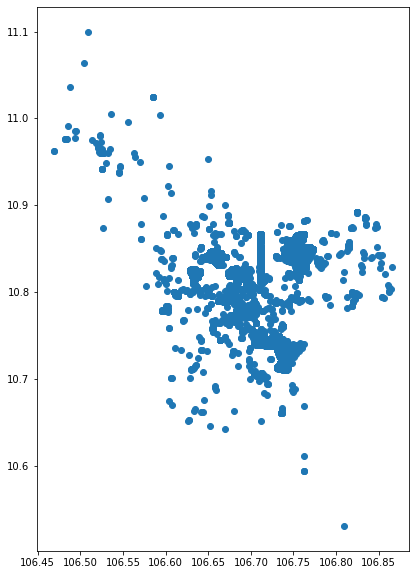

In [22]:
data_click.plot(figsize=(10,10))

# Bước 7: chạy KMean cho top 5 quận huyện này. Lấy K = 20

In [23]:
from sklearn.cluster import KMeans

In [24]:
def kmeans(df, par1, par2='geometry', n_clusters= 20):
  table = df[df.Dist_Name == par1]
  kmeans = KMeans(n_clusters)
  x = pd.Series(table[par2].apply(lambda p: p.x))
  y = pd.Series(table[par2].apply(lambda p: p.y))
  point = np.column_stack((x,y))
  y_means = kmeans.fit_predict(point)
  table['cluster'] = y_means
  return table



In [26]:
district_1 = kmeans(click_top_5, 'District 9')
district_2 = kmeans(click_top_5, 'Hoc Mon')
district_3 = kmeans(click_top_5, 'Nha Be')
district_4 = kmeans(click_top_5, 'District 12')
district_5 = kmeans(click_top_5, 'District 2')


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [27]:
print(district_1)

       dbh                    geometry  index_right   Dist_Name Dist_ID  \
222      1  POINT (106.76471 10.82926)         16.0  District 9     763   
429      1  POINT (106.79251 10.78538)         16.0  District 9     763   
1316     1  POINT (106.81852 10.78415)         16.0  District 9     763   
1381     1  POINT (106.76463 10.82930)         16.0  District 9     763   
2129     1  POINT (106.81964 10.78909)         16.0  District 9     763   
...    ...                         ...          ...         ...     ...   
81983    1  POINT (106.84658 10.87865)         16.0  District 9     763   
82069    1  POINT (106.78265 10.82731)         16.0  District 9     763   
82657    1  POINT (106.80625 10.84451)         16.0  District 9     763   
83095    1  POINT (106.83235 10.84348)         16.0  District 9     763   
83372    1  POINT (106.76182 10.82430)         16.0  District 9     763   

          Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  ...  Den_2013  \
222    District  256257.0

# Bước 8: Lưu 01 cụm điểm nhiều nhất trong các quận huyện ở Bước 5.

In [28]:
index_1 = district_1['cluster'].value_counts().idxmax()
index_2 = district_2['cluster'].value_counts().idxmax()
index_3 = district_3['cluster'].value_counts().idxmax()
index_4 = district_4['cluster'].value_counts().idxmax()
index_5 = district_5['cluster'].value_counts().idxmax()

In [29]:
cluster_data = dict()
cluster_data['District 9'] = district_1.where(district_1['cluster'] == index_1).dropna()
cluster_data['Hoc Mon'] = district_1.where(district_1['cluster'] == index_2).dropna()
cluster_data['Nha Be'] = district_1.where(district_1['cluster'] == index_3).dropna()
cluster_data['District 12'] = district_1.where(district_1['cluster'] == index_4).dropna()
cluster_data['District 2'] = district_1.where(district_1['cluster'] == index_5).dropna()


In [31]:
cluster_data['District 9']

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,growth_den,cluster
3321,1.0,POINT (106.81407 10.85064),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.27762,4.0
10041,1.0,POINT (106.81472 10.85354),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.27762,4.0
11864,1.0,POINT (106.81416 10.85071),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.27762,4.0
14717,1.0,POINT (106.81414 10.85450),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.27762,4.0
17351,1.0,POINT (106.81551 10.85723),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.27762,4.0
17761,1.0,POINT (106.81486 10.85358),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.27762,4.0
19829,1.0,POINT (106.81464 10.85036),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.27762,4.0
26007,1.0,POINT (106.81459 10.85042),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.27762,4.0
29336,1.0,POINT (106.81418 10.85077),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.27762,4.0
30875,1.0,POINT (106.81505 10.85354),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.27762,4.0


# Bước 9: show lên bản đồ các cụm đông nhất theo từng quận huyện theo dạng HEATMAP

In [32]:
data = []

for clu in cluster_data.values():
  x = pd.Series(clu['geometry'].apply(lambda p: p.x))
  y = pd.Series(clu['geometry'].apply(lambda p: p.y))

  point = np.column_stack((y,x))
  data = data + point.tolist()
  

In [33]:
color = ['red', 'green', 'blue', 'orange', 'yellow']
import random

In [34]:
from glob import glob
from folium import plugins
from folium.plugins import HeatMap

map = folium.Map([10.8, 106.7], titles='CartoDB positron', zoom_start=10)
HeatMap(data).add_to(map);

for _, r in data_top_5.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': color[random.randint(0,4)]})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(map)

In [35]:
map

In [36]:
HeatMap(data).add_to(map);

# Bước 10: Lưu heatmap xuống file png

In [37]:
!apt-get update 
!apt install chromium-chromedriver

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [948 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelea

In [38]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 5.2 MB/s 
     |████████████████████████████████| 140 kB 48.5 MB/s 
     |████████████████████████████████| 384 kB 66.5 MB/s 
     |████████████████████████████████| 58 kB 5.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [39]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


In [40]:
import os
map_path='MAP.html'
map.save(map_path)
map_URL='file://{path}/{mapfile}'.format(path=os.getcwd(), mapfile=map_path)

driver.get(map_URL)

driver.save_screenshot('map.png')
driver.quit()